## Information About Dataset
#### This data set contains customer level information for a telecom company. Various attributes related to the services used are recorded for each customer.

## What we'll do
#### We will design a deep learning model that informs us whether the customer will leave us or not.

# Import Libraries

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# Getting Data
data = pd.read_csv('telecom_churn.csv')
data.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


## Exploratory Data Analysis

In [32]:
print("Data's shape:", data.shape)
print("Summary of the dataset:\n",data.describe())

Data's shape: (3333, 11)
Summary of the dataset:
              Churn  AccountWeeks  ContractRenewal     DataPlan    DataUsage  \
count  3333.000000   3333.000000      3333.000000  3333.000000  3333.000000   
mean      0.144914    101.064806         0.903090     0.276628     0.816475   
std       0.352067     39.822106         0.295879     0.447398     1.272668   
min       0.000000      1.000000         0.000000     0.000000     0.000000   
25%       0.000000     74.000000         1.000000     0.000000     0.000000   
50%       0.000000    101.000000         1.000000     0.000000     0.000000   
75%       0.000000    127.000000         1.000000     1.000000     1.780000   
max       1.000000    243.000000         1.000000     1.000000     5.400000   

       CustServCalls      DayMins     DayCalls  MonthlyCharge   OverageFee  \
count    3333.000000  3333.000000  3333.000000    3333.000000  3333.000000   
mean        1.562856   179.775098   100.435644      56.305161    10.051488   
std 

In [33]:
data.isnull().sum() # We don't have any null wariables.(So,you can pass the missing values handling part.)

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

## Correlation

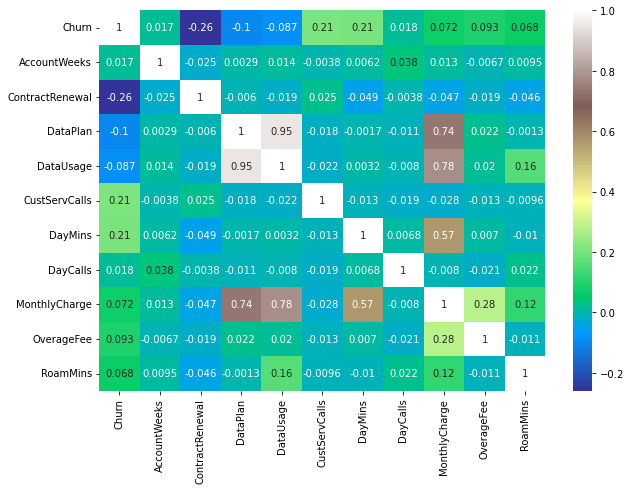

In [34]:
sns.heatmap(data.corr(),annot = True,cmap='terrain')
fig = plt.gcf()
fig.set_size_inches(10,7)
plt.show()

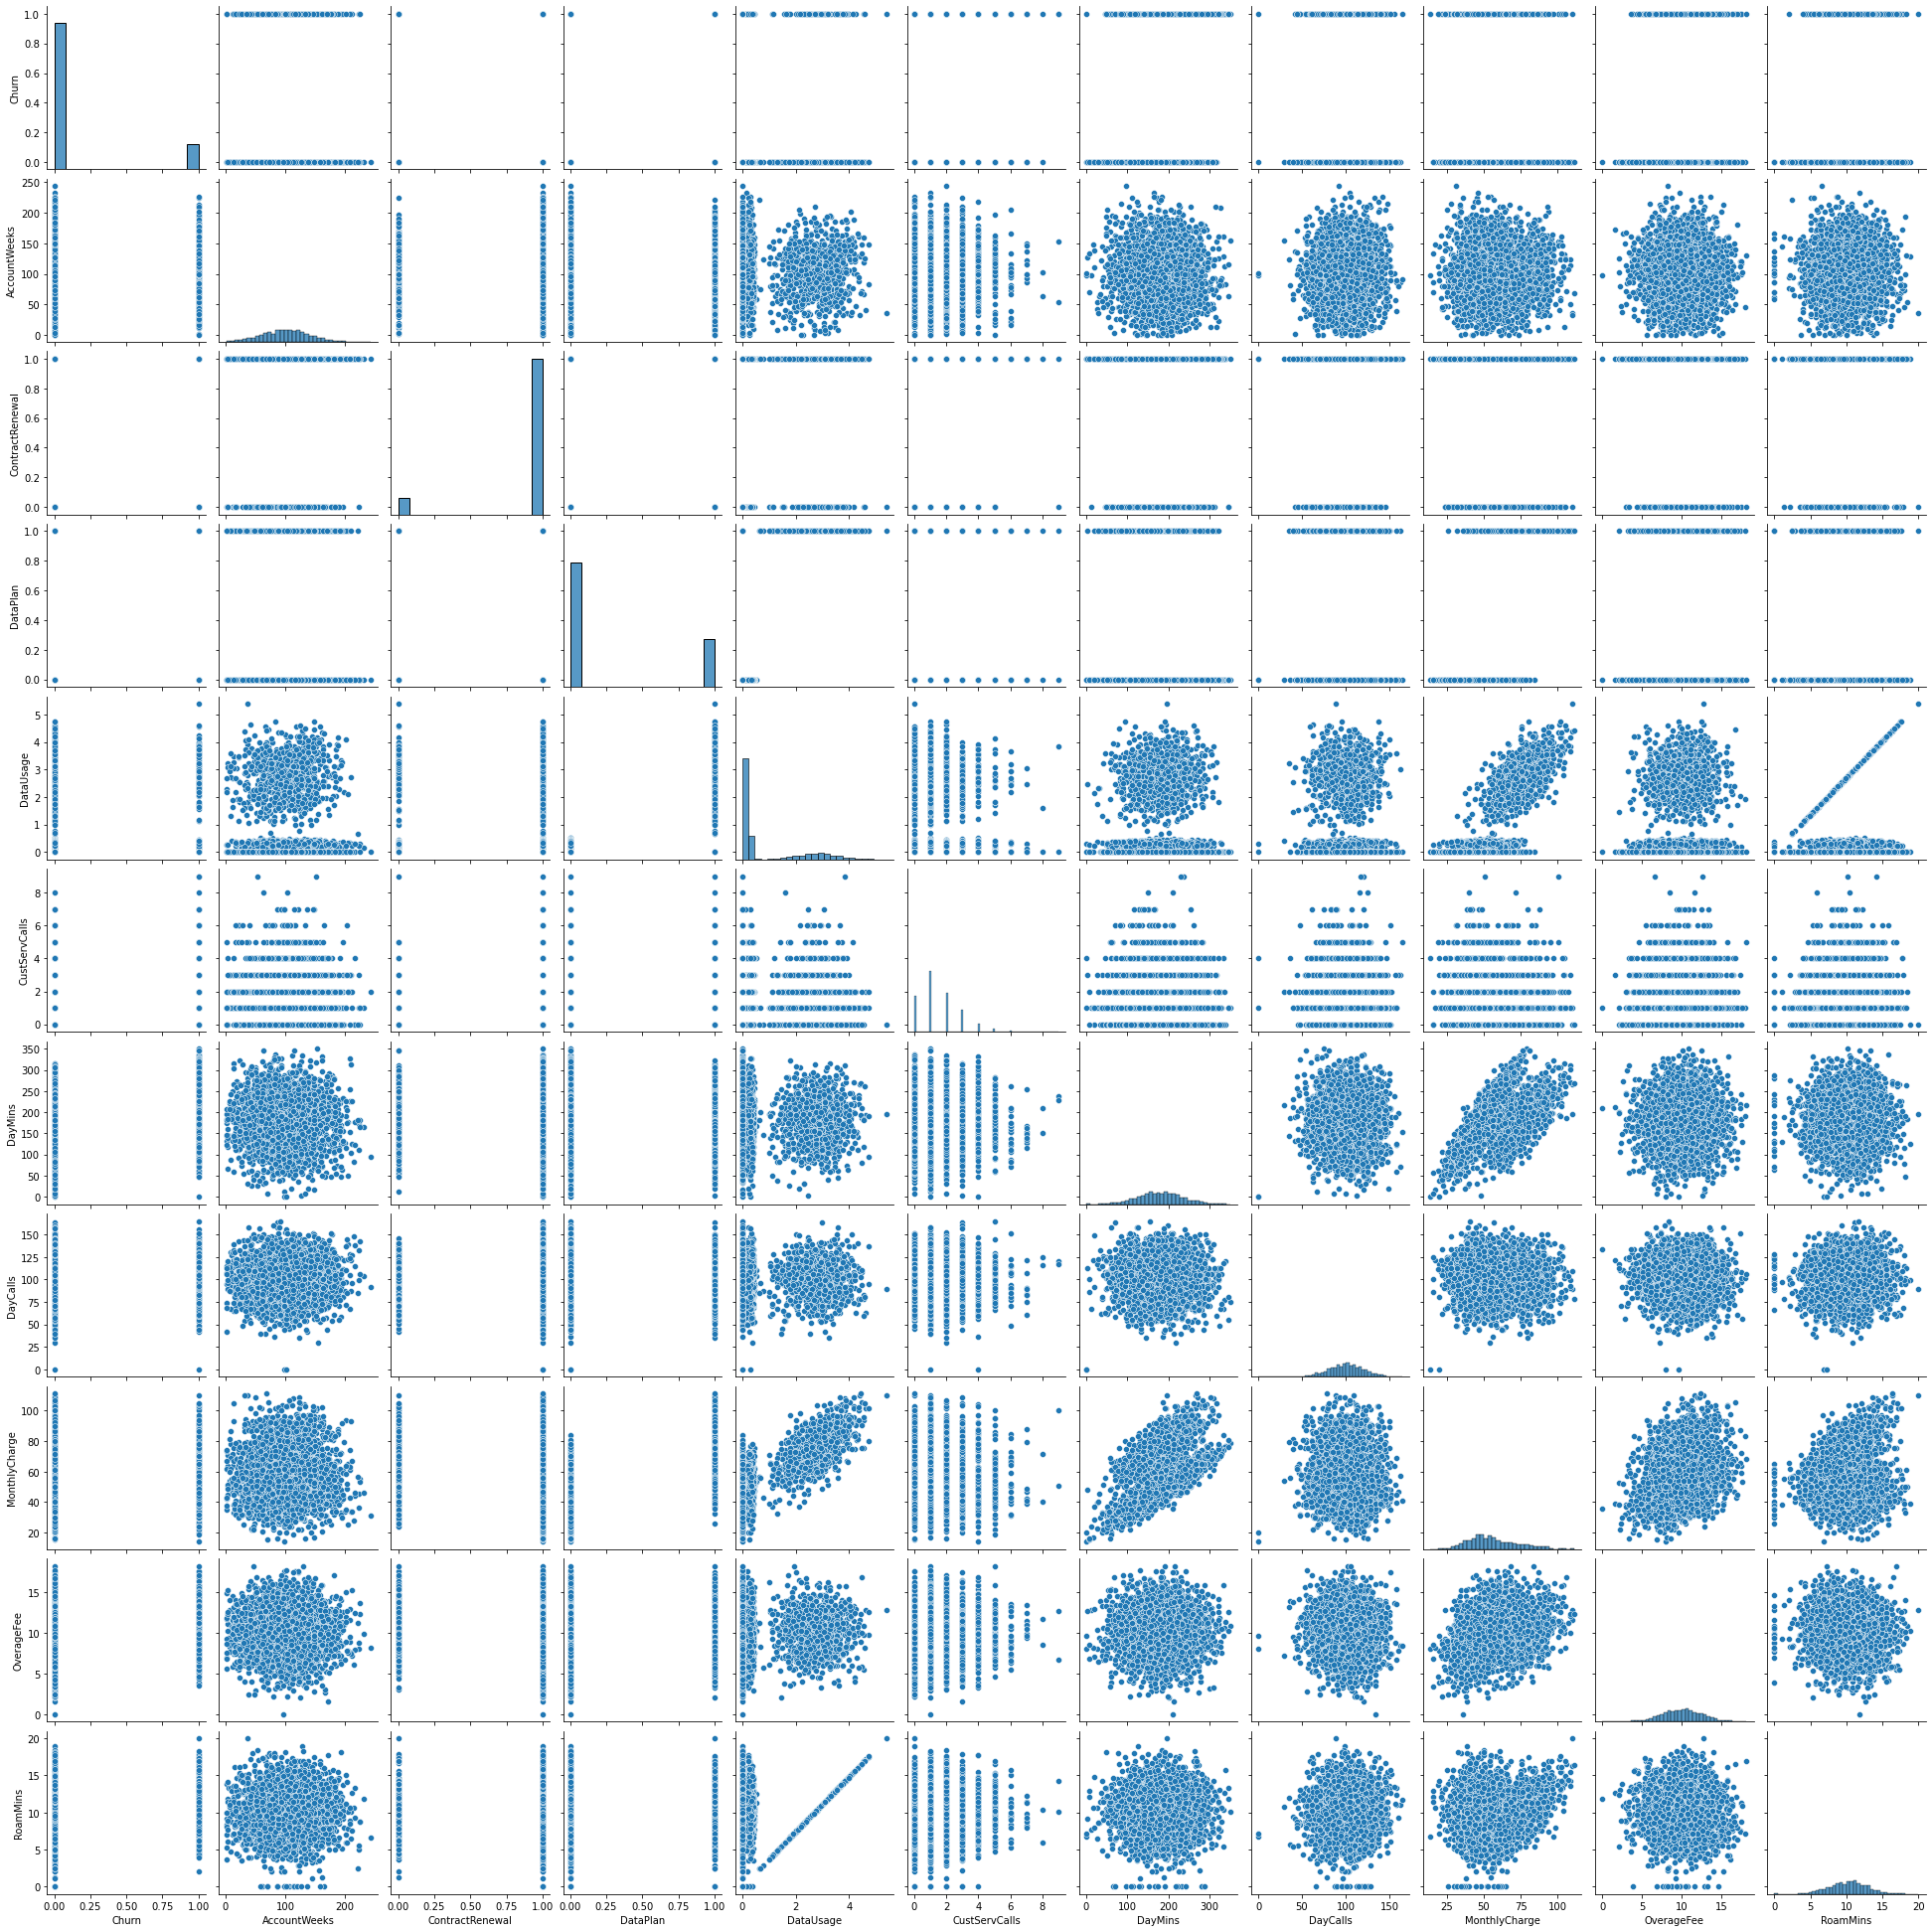

In [37]:
sns.pairplot(data)
figsize = (20,20)

## Feature Selection
##### Each of these features provides important information about whether the customer will leave us or not. Therefore, we will not exclude any feature from the dataset and use it.

In [36]:
X = data.iloc[:,1:11]
X

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...
3328,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


In [38]:
Y = data['Churn']
Y
print("All the positive values(1) are:",Y.values.sum(),"\n")
print("All the negative values(0) are:",Y.shape - Y.values.sum(),"\n")

All the positive values(1) are: 483 

All the negative values(0) are: [2850] 



C:\Users\User\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


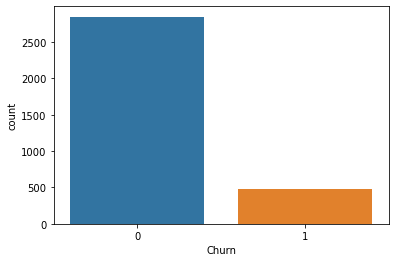

In [39]:
sns.countplot(Y)
plt.show()

## Outlier Detection

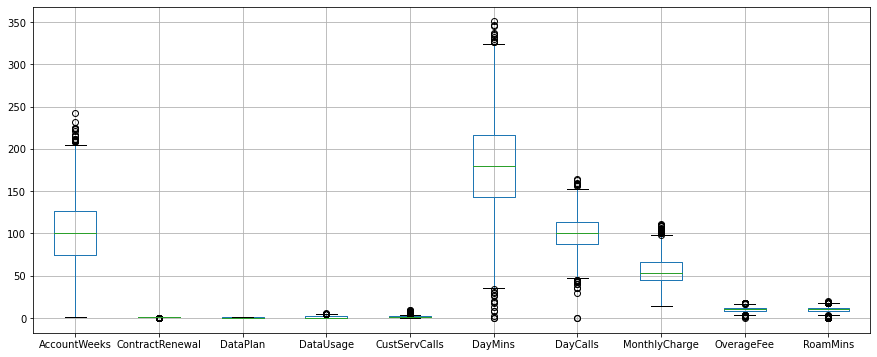

In [40]:
X.boxplot(figsize = (15,6))
plt.show()

The histogram chart gives us good information about the distribution of the data.


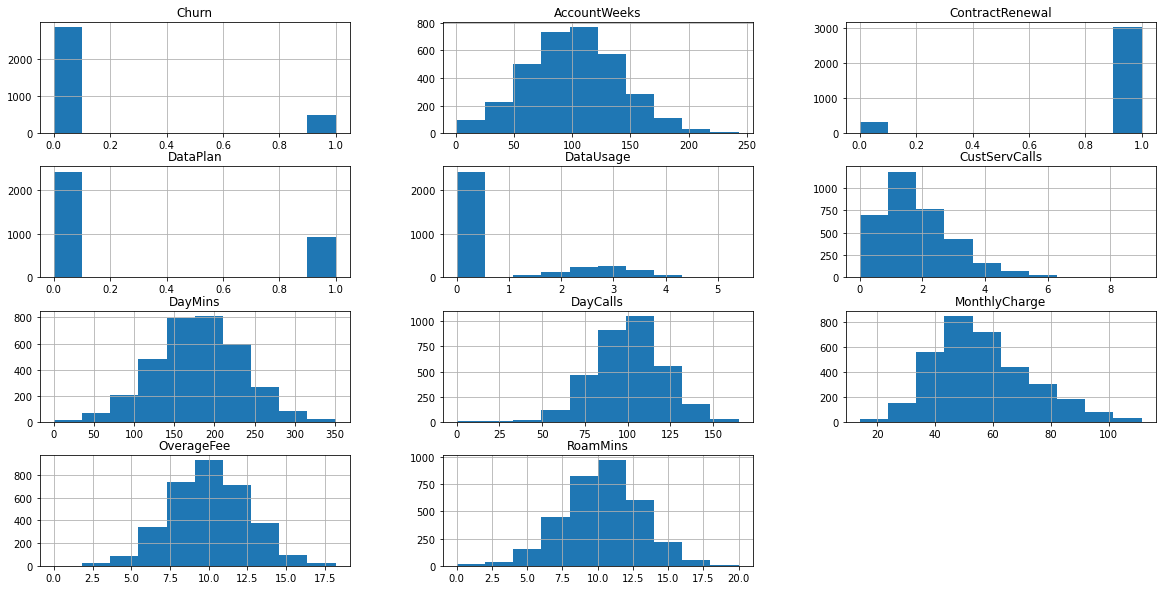

In [41]:
print("The histogram chart gives us good information about the distribution of the data.")
data.hist(figsize=(20,10))
plt.show()

## Spliting Data

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.33,random_state=1)
print("x train shape:",x_train.shape,"\n")
print("x test shape:",x_test.shape,"\n")
print("y train shape:",y_train.shape,"\n")
print("y test shape:",y_test.shape,"\n")

x train shape: (2233, 10) 

x test shape: (1100, 10) 

y train shape: (2233,) 

y test shape: (1100,) 



## Data Scaling
#### There is a huge difference in numbers between the given data, so we have to scale the data.

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler =  MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
print("x_train:",x_train,"\n")
print("x_test:",x_test)

x_train: [[0.1875     1.         0.         ... 0.09044193 0.37092732 0.535     ]
 [0.85714286 1.         1.         ... 0.59815005 0.50250627 0.615     ]
 [0.6875     1.         0.         ... 0.32887975 0.39223058 0.565     ]
 ...
 [0.41071429 1.         0.         ... 0.24665982 0.64849624 0.71      ]
 [0.61607143 1.         0.         ... 0.27749229 0.52882206 0.51      ]
 [0.58482143 1.         1.         ... 0.6659815  0.63596491 0.515     ]] 

x_test: [[0.2768595  1.         0.         ... 0.43715239 0.54810335 0.4973545 ]
 [0.41735537 1.         0.         ... 0.25917686 0.67619571 0.48148148]
 [0.29338843 1.         0.         ... 0.47830923 0.29686641 0.67195767]
 ...
 [0.44214876 1.         0.         ... 0.22580645 0.53271028 0.21693122]
 [0.38016529 1.         0.         ... 0.32703003 0.51236943 0.57671958]
 [0.5        1.         0.         ... 0.52614016 0.73611875 0.46560847]]


## Model Training and Model Evaluation

In [44]:
from keras.models import Sequential
from keras.layers import Dense

In [45]:
model = Sequential()
model.add(Dense(16, input_dim=10, activation='relu')) # You can try another activation functions.
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer = 'adam',loss='binary_crossentropy',metrics = ['accuracy'])
# You can try rmsprom or another optimizer.
# We chose binary_crosssentropy for loss because our output value is binary(1 or 0).
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                176       
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [49]:
history = model.fit(x_train,y_train,
          batch_size=128,
          epochs=20
         )
# I set epoch to 20 and batch size to 128, you can change it if you want.

Epoch 1/20
18/18 [==============================] - 0s 1ms/step - loss: 0.7169 - accuracy: 0.3233
Epoch 2/20
18/18 [==============================] - 0s 1ms/step - loss: 0.6599 - accuracy: 0.8271
Epoch 3/20
18/18 [==============================] - 0s 1ms/step - loss: 0.6130 - accuracy: 0.8540
Epoch 4/20
18/18 [==============================] - 0s 1ms/step - loss: 0.5681 - accuracy: 0.8540
Epoch 5/20
18/18 [==============================] - 0s 1ms/step - loss: 0.5233 - accuracy: 0.8540
Epoch 6/20
18/18 [==============================] - 0s 1ms/step - loss: 0.4803 - accuracy: 0.8540
Epoch 7/20
18/18 [==============================] - 0s 1ms/step - loss: 0.4478 - accuracy: 0.8540
Epoch 8/20
18/18 [==============================] - 0s 1ms/step - loss: 0.4271 - accuracy: 0.8540
Epoch 9/20
18/18 [==============================] - 0s 1ms/step - loss: 0.4147 - accuracy: 0.8540
Epoch 10/20
18/18 [==============================] - 0s 1ms/step - loss: 0.4051 - accuracy: 0.8540
Epoch 11/20
18/18 [

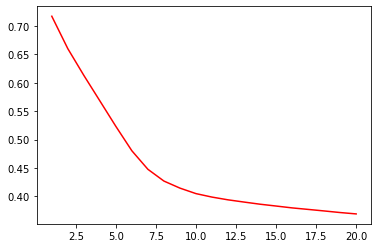

In [50]:
loss = history.history['loss']
epochs = range(1,len(loss)+1)
plt.plot(epochs,loss,color='r')
plt.show()

In [47]:
y_pred = model.predict(x_test)

35/35 [==============================] - 0s 733us/step


In [48]:
y_pred

array([[0.55694085],
       [0.5149742 ],
       [0.58092374],
       ...,
       [0.5150527 ],
       [0.5444011 ],
       [0.5502094 ]], dtype=float32)